In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score

import warnings
warnings.simplefilter('ignore')

In [36]:
df = pd.read_csv('Admission_Predict.csv')
df.drop(columns='Serial No.', inplace=True)

In [37]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=42)

# HistGBM

In [39]:
clf = HistGradientBoostingRegressor()

In [40]:
clf.fit(Xtrain, ytrain)

HistGradientBoostingRegressor()

In [41]:
r2_score(ytest, clf.predict(Xtest))

0.7788666921155867

In [42]:
params = {'learning_rate':[0.05, 0.1, 0.2, 0.3, 0.5],
         'max_leaf_nodes':range(2,35),
         'max_depth':range(2,30), 
         'min_samples_leaf':range(2,30),
         'l2_regularization': [0.1, 0.2, 0.3, 0.5, 0.7], 
         'max_bins' : [50, 100, 150, 255, 300]}

In [43]:
tune = RandomizedSearchCV(clf, params, n_iter=10, n_jobs=-1, cv = KFold(5), verbose = 8)

In [44]:
tune.fit(Xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=HistGradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'l2_regularization': [0.1, 0.2, 0.3,
                                                              0.5, 0.7],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_bins': [50, 100, 150, 255, 300],
                                        'max_depth': range(2, 30),
                                        'max_leaf_nodes': range(2, 35),
                                        'min_samples_leaf': range(2, 30)},
                   verbose=8)

In [45]:
tune.best_estimator_

HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.05,
                              max_bins=150, max_depth=18, max_leaf_nodes=16,
                              min_samples_leaf=16)

In [46]:
new_clf = HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.05,
                              max_bins=150, max_depth=18, max_leaf_nodes=16,
                              min_samples_leaf=16)

In [47]:
new_clf.fit(Xtrain, ytrain)

HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.05,
                              max_bins=150, max_depth=18, max_leaf_nodes=16,
                              min_samples_leaf=16)

In [48]:
r2_score(ytest, new_clf.predict(Xtest))

0.7968379074245767

In [49]:
scores = cross_val_score(new_clf, Xtrain, ytrain, scoring='r2', cv = KFold(5))

In [64]:
# Training accuracy
print(scores.mean())
print(scores)

0.7213047684424009
[0.6392179  0.73652879 0.66087452 0.76186071 0.80804193]


In [65]:
#Testing accuracy
scores = cross_val_score(new_clf, Xtest, ytest, scoring='r2', cv = KFold(5))
print(scores.mean())
print(scores)

0.8020484239059906
[0.77703334 0.86129286 0.68455355 0.83779555 0.84956682]


# Light GBM

In [66]:
import lightgbm
lgbm = lightgbm.LGBMRegressor()

In [67]:
lgbm.fit(Xtrain, ytrain)

LGBMRegressor()

In [68]:
#r2_score(ytest, lgbm.predict(Xtest))
scores = cross_val_score(lgbm, Xtrain, ytrain, scoring='r2', cv = KFold(5))
print(scores, "\n",scores.mean())

[0.68302053 0.77444184 0.6981166  0.78572433 0.83742777] 
 0.7557462146297528


In [77]:
params = {
         'num_leaves':range(5,200),
         'max_depth':range(2,20),
         'max_bin':range(50,301,50),
         'min_data_in_bin':range(5,20),
          'learning_rate': [0.05,0.1,0.2,0.3,0.5,0.7],
          'n_estimators': [50,100,150,200,250,300,350]
         }

In [78]:
tune = RandomizedSearchCV(lgbm, params, n_iter=10, n_jobs=-1, cv = KFold(10))

In [79]:
tune.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.5, 0.7],
                                        'max_bin': range(50, 301, 50),
                                        'max_depth': range(2, 20),
                                        'min_data_in_bin': range(5, 20),
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350],
                                        'num_leaves': range(5, 200)})

In [80]:
tune.best_estimator_

LGBMRegressor(learning_rate=0.05, max_bin=100, max_depth=3, min_data_in_bin=8,
              n_estimators=150, num_leaves=98)

In [81]:
new_lgbm = lightgbm.LGBMRegressor(learning_rate=0.05, max_bin=100, max_depth=3, min_data_in_bin=8,
              n_estimators=150, num_leaves=98)

In [82]:
 new_lgbm.fit(Xtrain, ytrain)

LGBMRegressor(learning_rate=0.05, max_bin=100, max_depth=3, min_data_in_bin=8,
              n_estimators=150, num_leaves=98)

In [83]:
# training accuracy
scores = cross_val_score(new_lgbm, Xtrain, ytrain, scoring='r2', cv = KFold(5))
print(scores, "\nMean Score = ",scores.mean())

[0.69670448 0.79044713 0.70044808 0.79248309 0.8535294 ] 
Mean Score =  0.7667224374530264


In [84]:
#Testing accuracy
scores = cross_val_score(new_lgbm, Xtest, ytest, scoring='r2', cv = KFold(5))
print(scores.mean())
print(scores)

0.7508058381867649
[0.73206855 0.7948449  0.58022411 0.83462538 0.81226626]


# HistGBM predicted better than LightGBM

In [85]:
sort = new_lgbm.feature_importances_.argsort()

Text(0.5, 0, 'Feature Importance')

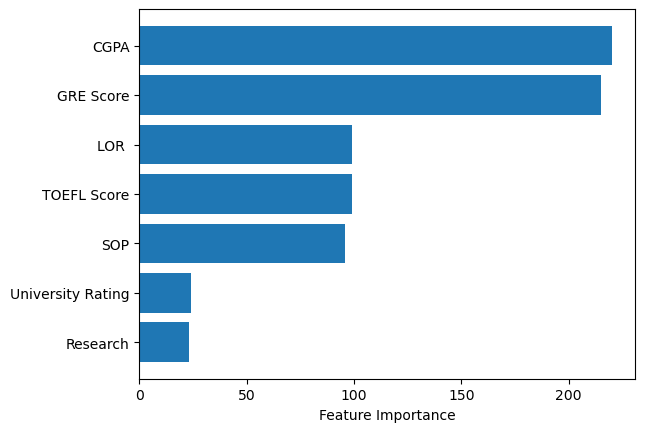

In [86]:
plt.barh(df.columns[sort], new_lgbm.feature_importances_[sort])
plt.xlabel("Feature Importance")

# CGPA and GRE Score very important for post-graduate selection